In [3]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data from csv file.
ml_df = pd.read_csv("Resources/Data_Cleaned/olist_final_data.csv", index_col=0)
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91596 entries, 3ccb27f9c7ee205656acef98c19fc061 to 4239915703664cce7690bd8ae0f82839
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zipcode                        91596 non-null  int64  
 1   customer_city                  91596 non-null  object 
 2   customer_state                 91596 non-null  object 
 3   geolocation_lat                91596 non-null  float64
 4   geolocation_lng                91596 non-null  float64
 5   customer_id                    91596 non-null  object 
 6   order_status                   91596 non-null  object 
 7   order_purchase_timestamp       91596 non-null  object 
 8   order_approved_at              91596 non-null  object 
 9   order_delivered_carrier_date   91596 non-null  object 
 10  order_delivered_customer_date  91596 non-null  object 
 11  order_estimated_delivery_date  91596 non-null  object

In [3]:
# Check dataframe.
ml_df.head()

,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_id,product_category_name1,product_photos_qty,product_category_name,product_category_name_english,seller_zip,seller_city,seller_state
cust_id,,,,,,,,,,,,,,,,,,,,,
3ccb27f9c7ee205656acef98c19fc061,91340,porto alegre,RS,-30.028941,-51.180072,3ccb27f9c7ee205656acef98c19fc061,delivered,2018-04-16,2018-04-16,2018-05-08,...,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,relogios_presentes,2,relogios_presentes,watches_gifts,13101,campinas,SP
5f7f9c1ee727aca3b625220c95177f4f,13635,pirassununga,SP,-21.971013,-47.426693,5f7f9c1ee727aca3b625220c95177f4f,delivered,2018-05-09,2018-05-11,2018-05-16,...,1,62.69,a70d74f54feefedd8108c45553766340,fashion_underwear_e_moda_praia,1,fashion_underwear_e_moda_praia,fashion_underwear_beach,14401,franca,SP
c4cb1295499744937c6be430505b7003,37975,itau de minas,MG,-20.746977,-46.749023,c4cb1295499744937c6be430505b7003,delivered,2018-08-07,2018-08-07,2018-08-08,...,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,cama_mesa_banho,2,cama_mesa_banho,bed_bath_table,80010,curitiba,PR
3f35b35a0b55d214f94c94c9e1a1deaa,35720,matozinhos,MG,-19.559993,-44.085206,3f35b35a0b55d214f94c94c9e1a1deaa,delivered,2017-06-15,2017-06-15,2017-06-19,...,1,30.60,e4d1cdc6559e08672c98c73a21305521,esporte_lazer,1,esporte_lazer,sports_leisure,28495,aperibe,RJ
11ca735fecae936dacfea16499b4b4d7,36700,leopoldina,MG,-21.526803,-42.641060,11ca735fecae936dacfea16499b4b4d7,delivered,2017-05-02,2017-05-03,2017-05-08,...,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,cama_mesa_banho,1,cama_mesa_banho,bed_bath_table,14940,ibitinga,SP


In [4]:
# Drop duplicate columns.
final_df = ml_df.drop(columns = ["customer_id", "product_category_name1", "product_category_name"])
final_df.head()

,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_photos_qty,product_category_name_english,seller_zip,seller_city,seller_state
cust_id,,,,,,,,,,,,,,,,,,,,,
3ccb27f9c7ee205656acef98c19fc061,91340,porto alegre,RS,-30.028941,-51.180072,delivered,2018-04-16,2018-04-16,2018-05-08,2018-05-16,...,1,credit_card,1,165.83,e0d64dcfaa3b6db5c54ca298ae101d05,2,watches_gifts,13101,campinas,SP
5f7f9c1ee727aca3b625220c95177f4f,13635,pirassununga,SP,-21.971013,-47.426693,delivered,2018-05-09,2018-05-11,2018-05-16,2018-05-21,...,1,boleto,1,62.69,a70d74f54feefedd8108c45553766340,1,fashion_underwear_beach,14401,franca,SP
c4cb1295499744937c6be430505b7003,37975,itau de minas,MG,-20.746977,-46.749023,delivered,2018-08-07,2018-08-07,2018-08-08,2018-08-13,...,1,credit_card,2,87.27,d7a2f0c3a43042d52cf8361958342c5d,2,bed_bath_table,80010,curitiba,PR
3f35b35a0b55d214f94c94c9e1a1deaa,35720,matozinhos,MG,-19.559993,-44.085206,delivered,2017-06-15,2017-06-15,2017-06-19,2017-06-26,...,1,credit_card,1,30.60,e4d1cdc6559e08672c98c73a21305521,1,sports_leisure,28495,aperibe,RJ
11ca735fecae936dacfea16499b4b4d7,36700,leopoldina,MG,-21.526803,-42.641060,delivered,2017-05-02,2017-05-03,2017-05-08,2017-05-17,...,1,credit_card,10,316.34,f9be8e0e5acd947d8f49dbc390b9ab20,1,bed_bath_table,14940,ibitinga,SP


In [5]:
# Get column datatypes and other info.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91596 entries, 3ccb27f9c7ee205656acef98c19fc061 to 4239915703664cce7690bd8ae0f82839
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zipcode                        91596 non-null  int64  
 1   customer_city                  91596 non-null  object 
 2   customer_state                 91596 non-null  object 
 3   geolocation_lat                91596 non-null  float64
 4   geolocation_lng                91596 non-null  float64
 5   order_status                   91596 non-null  object 
 6   order_purchase_timestamp       91596 non-null  object 
 7   order_approved_at              91596 non-null  object 
 8   order_delivered_carrier_date   91596 non-null  object 
 9   order_delivered_customer_date  91596 non-null  object 
 10  order_estimated_delivery_date  91596 non-null  object 
 11  order_item_id                  91596 non-null  int64 

In [19]:
# Create review_score dataframe.
reviews = final_df['review_score']
review_df = pd.DataFrame(reviews)
review_df 

,review_score
cust_id,
3ccb27f9c7ee205656acef98c19fc061,2
5f7f9c1ee727aca3b625220c95177f4f,5
c4cb1295499744937c6be430505b7003,5
3f35b35a0b55d214f94c94c9e1a1deaa,4
11ca735fecae936dacfea16499b4b4d7,5
...,...
78c7b2accd9ccf59f8a11033771502e6,4
1673f453ac44985d748c41c89551e0db,4
186093e7d810150c5c60f44f03ac2a23,1


<AxesSubplot:xlabel='review_score', ylabel='count'>

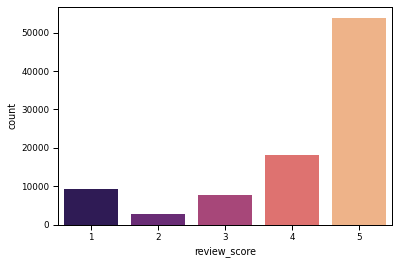

In [20]:
# Use seaborn to plot count of review_scores. 
sns.set_context('paper')
 
# Load dataset.
df = review_df

# Create plot.
sns.countplot(x = 'review_score', data = df, palette = 'magma')


In [32]:
# Create variable with counts of each seller_state.
states = final_df.sort_values('seller_state') 
states

,zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_photos_qty,product_category_name_english,seller_zip,seller_city,seller_state
cust_id,,,,,,,,,,,,,,,,,,,,,
86c180c33f454b35e1596a99da3dddc4,95890,teutonia,RS,-29.513655,-51.810980,delivered,2018-05-20,2018-05-20,2018-05-21,2018-06-06,...,1,credit_card,3,120.24,00066f42aeeb9f3007548bb9d3f33c38,6,perfumery,3694,sao paulo,SP
68f2b37558e27791155db34bcded5ac0,14403,franca,SP,-20.548228,-47.395897,delivered,2017-12-12,2017-12-12,2017-12-20,2017-12-23,...,1,credit_card,1,143.83,00088930e925c41fd95ebfe695fd2655,4,auto,16301,penapolis,SP
6cd217b674e22cf568f6a2cf6060fd07,2883,sao paulo,SP,-23.440039,-46.716686,delivered,2017-12-21,2017-12-22,2018-01-02,2018-01-06,...,1,credit_card,10,242.10,0009406fd7479715e4bef61dd91f2462,2,bed_bath_table,14940,ibitinga,SP
82b838f513e00463174cc7cae7e76c1f,95174,farroupilha,RS,-29.214094,-51.348017,delivered,2018-08-10,2018-08-10,2018-08-13,2018-08-17,...,1,credit_card,4,78.50,000b8f95fcb9e0096488278317764d19,3,housewares,85603,francisco beltrao,PR
8517e7c86998bf39a540087da6f115d9,93530,novo hamburgo,RS,-29.660662,-51.113337,delivered,2018-08-01,2018-08-01,2018-08-02,2018-08-07,...,1,credit_card,1,78.50,000b8f95fcb9e0096488278317764d19,3,housewares,85603,francisco beltrao,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35e8f2cff4eeed925cfa42f6731a4425,3820,sao paulo,SP,-23.493601,-46.502477,delivered,2018-05-01,2018-05-01,2018-05-02,2018-05-03,...,1,credit_card,3,42.38,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,computers_accessories,4102,sao paulo,SP
a050cd2edce49d430222e6019fa50fd2,5591,sao paulo,SP,-23.580017,-46.733463,delivered,2018-08-07,2018-08-07,2018-08-09,2018-08-09,...,1,debit_card,1,42.50,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,computers_accessories,4102,sao paulo,SP
550ccac77275f9cdec4b6cd97ac118d0,4547,sao paulo,SP,-23.593509,-46.691605,delivered,2018-08-10,2018-08-10,2018-08-13,2018-08-14,...,1,credit_card,1,42.50,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,computers_accessories,4102,sao paulo,SP


In [26]:
# Create dataframe using seller state and count of seller state.
states_df = pd.DataFrame(states)
states_df

,0
seller_state,
SP,64897
MG,7220
PR,7073
RJ,3977
SC,3422
RS,1847
DF,765
BA,530
GO,430


<AxesSubplot:xlabel='seller_state', ylabel='count'>

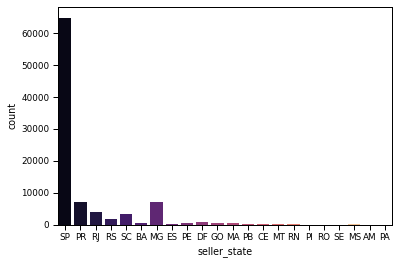

In [13]:
# Use seaborn to plot seller_state and count of seller_state.
sns.set_context('paper')
 
# Load dataset.
df = final_df

# Create plot.
sns.countplot(x = 'seller_state', data = df, palette = 'magma')

<AxesSubplot:xlabel='customer_state', ylabel='count'>

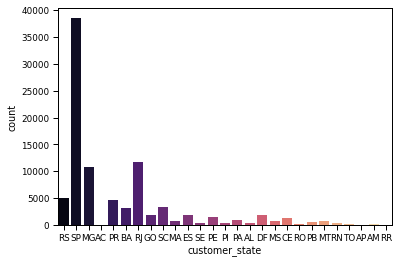

In [25]:
# Use seaborn to plot coustomer_state vs count of customer_state.
sns.countplot(x = 'customer_state', data = df, palette = 'magma')

<AxesSubplot:xlabel='product_category_name_english', ylabel='count'>

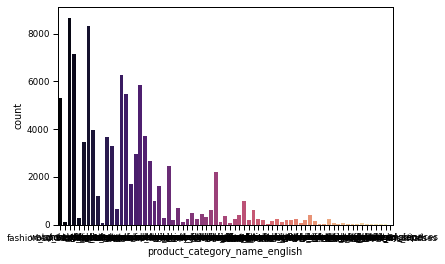

In [26]:
# Use seaborn to plot product_category vs count of product_category. 
sns.countplot(x = 'product_category_name_english', data = df, palette = 'magma')

<AxesSubplot:xlabel='payment_type', ylabel='count'>

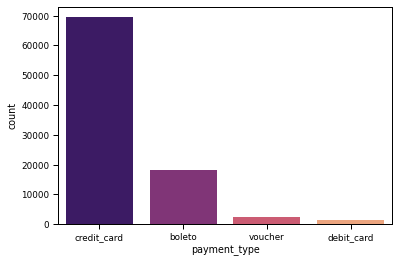

In [27]:
# Use seaborn to plot payment_type vs count of payment_type.
sns.countplot(x = 'payment_type', data = df, palette = 'magma')

<AxesSubplot:xlabel='freight_value', ylabel='count'>

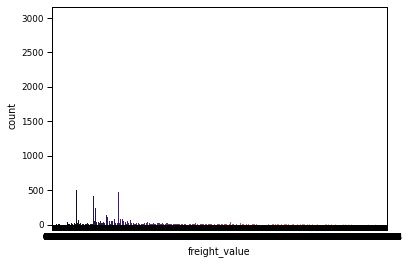

In [28]:
# Use seaborn to plot freight_value vs count of freight_value.
sns.countplot(x = 'freight_value', data = df, palette = 'magma')

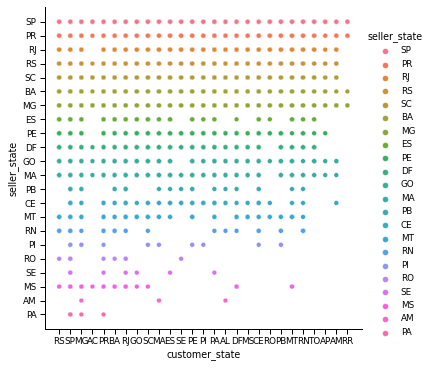

In [21]:
# Plot customer_state vs seller_state using seaborn.
sns.relplot(data=final_df, x="customer_state", y="seller_state", hue="seller_state")

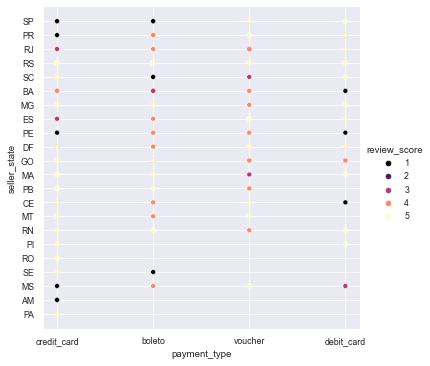

In [28]:
# Plot payment_type vs seller_state using seaborn.
sns.relplot(data=final_df, x="payment_type", y="seller_state", hue="review_score", palette="magma")

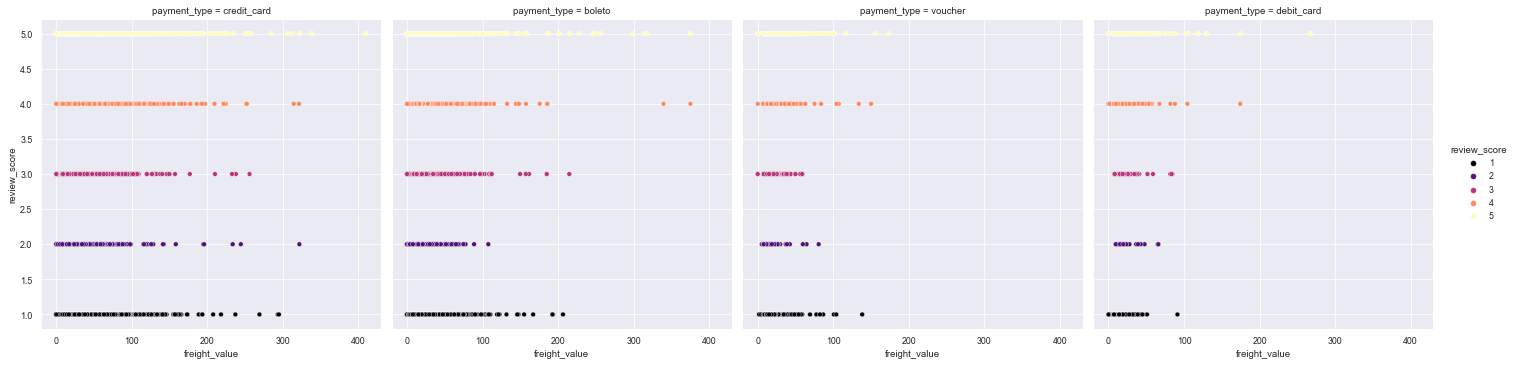

In [26]:
# Plot payment_type vs seller_state in grid using seaborn.
sns.relplot(data=final_df, x="freight_value", y="review_score", hue="review_score", col="payment_type",\
            col_wrap=4, palette = "magma")

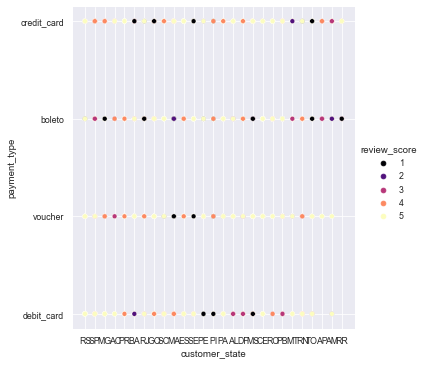

In [30]:
# Plot  customer_state vs payment_type using seaborn.
sns.relplot(data=final_df, x="customer_state", y="payment_type", hue="review_score",  palette = "magma")

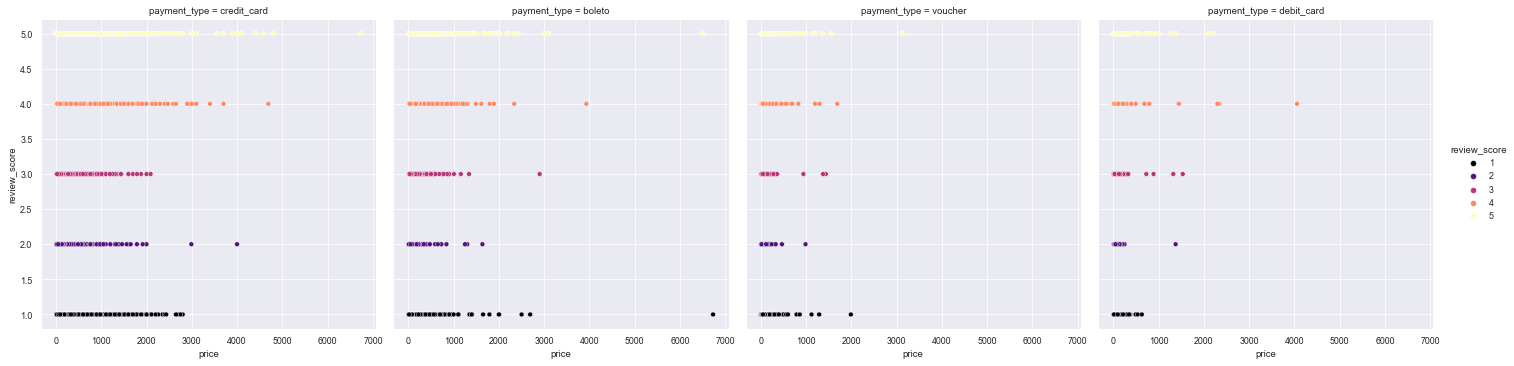

In [27]:
# Use seaborn to plot price vs review_score in columns by payment_type and color coded by review_score.
sns.relplot(data=final_df, x="price", y="review_score", hue="review_score", col="payment_type", col_wrap=4,\
            palette = "magma")

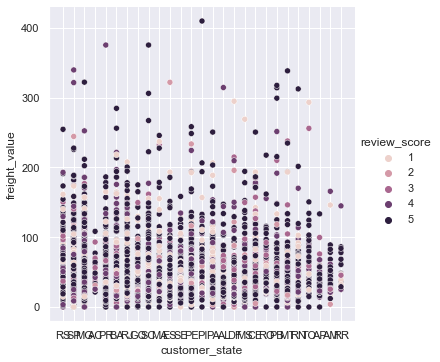

In [16]:
# Use seaborn to plot customer_state vs freight_value.
# Apply the default theme.
sns.set_theme()

# Load an example dataset.
freight = final_df

# Create a visualization.
sns.relplot(
    data=freight,
    x="customer_state", y="freight_value", 
    hue="review_score", 
)

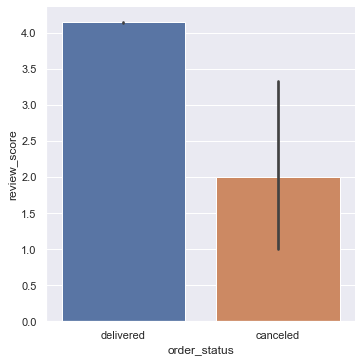

In [12]:
# Use seaborn to plot order_status vs review score.
# Apply the default theme.
sns.set_theme()

# Load an example dataset.
reviews = final_df

# Create a visualization.
sns.catplot(data=reviews, kind="bar", x="order_status", y="review_score")

In [30]:
# Print top 5 counts of product_category.
top_product_categories = final_df['product_category_name_english'].value_counts().head(5)
top_product_categories

bed_bath_table           8683
health_beauty            8318
sports_leisure           7157
computers_accessories    6265
furniture_decor          5872
Name: product_category_name_english, dtype: int64

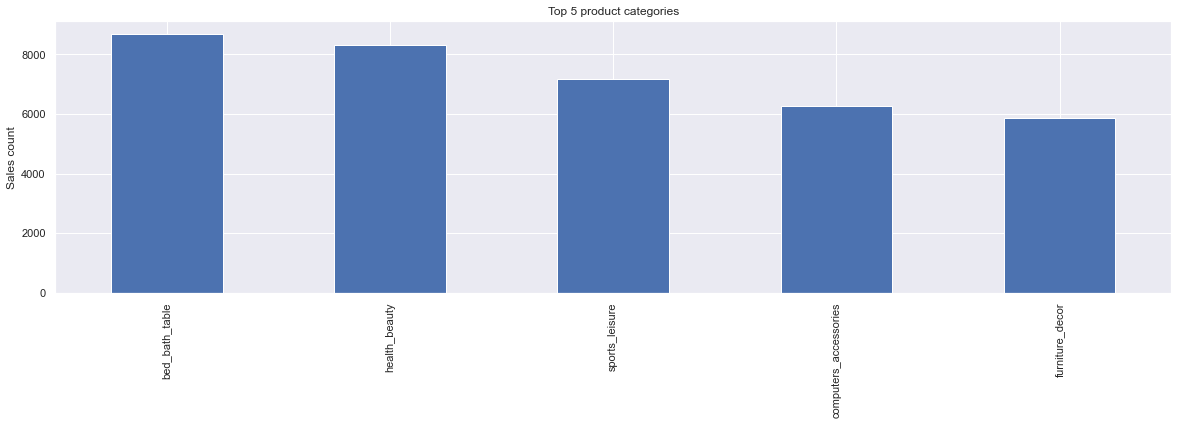

In [31]:
# Plot top 5 product categories.
top_product_categories.plot(kind='bar', figsize=(20, 5))
plt.title('Top 5 product categories')
plt.ylabel('Sales count');

In [32]:
# Create top 5 States variable.
top_5_states = final_df['customer_state'].value_counts().head(5)

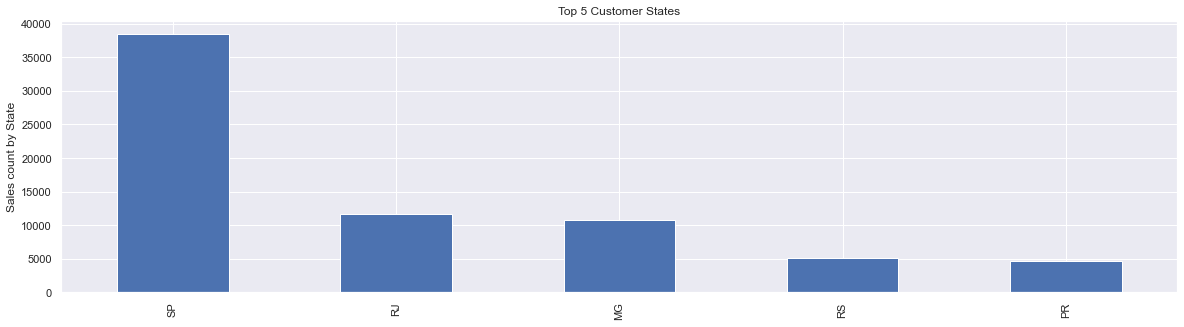

In [33]:
# Plot top 5 States.
top_5_states.plot(kind='bar', figsize=(20, 5))
plt.title('Top 5 Customer States')
plt.ylabel('Sales count by State');

In [34]:
# Create variable for top 5 zipcodes.
top_5_zipcodes = final_df['zipcode'].value_counts().head(5)

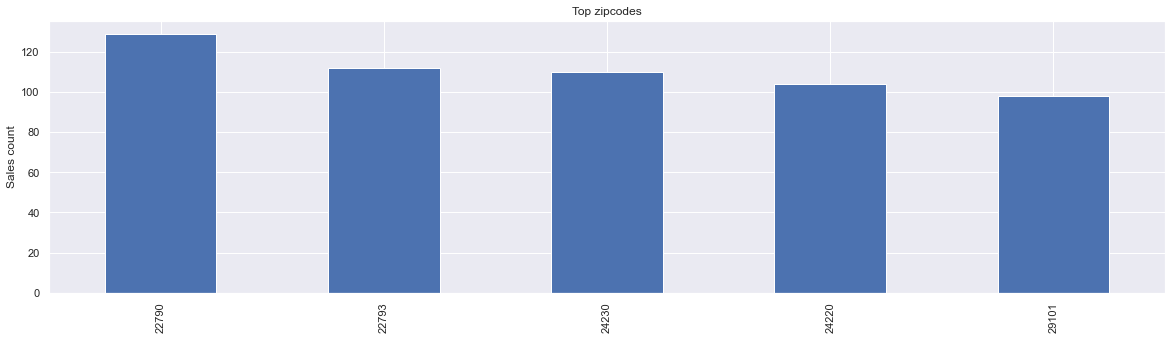

In [35]:
# Plot top 5 zipcodes.
top_5_zipcodes.plot(kind='bar', figsize=(20, 5))
plt.title('Top zipcodes')
plt.ylabel('Sales count');

In [36]:
# Create top 5 cities variable.
top_5_cities = final_df["customer_city"].value_counts().head(5)

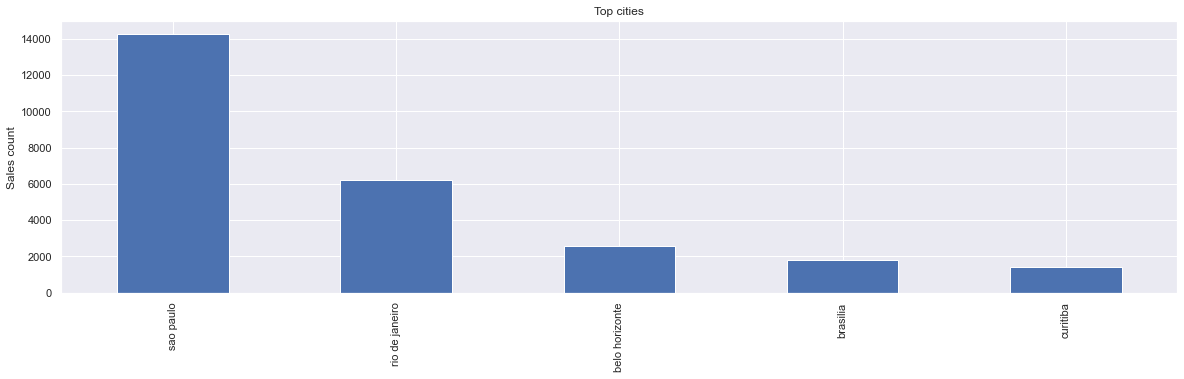

In [37]:
# Plot Top 5 Cities.
top_5_cities.plot(kind='bar', figsize=(20, 5))
plt.title('Top cities')
plt.ylabel('Sales count');